<hr>

**Needed Libraries**

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

<hr>

**Since we were not able to load model from Github, hence we have used KaggleHub to get the model**

In [ ]:
!pip install kagglehub

<hr>

**Using kaggleHub to get the data**

In [ ]:
import kagglehub

# Getting the latest version of the model, ResNEt
path = kagglehub.model_download("tensorflow/faster-rcnn-resnet-v1/tensorFlow2/faster-rcnn-resnet152-v1-640x640")

# This is the path to the model, where the model will be stored after downloading
print("Path to model files:", path)


  0%|          | 0.00/242M [00:00<?, ?B/s]



100%|██████████| 12.2k/12.2k [00:00<00:00, 17.2MB/s]




  0%|          | 0.00/12.4M [00:00<?, ?B/s]
  0%|          | 1.00M/242M [00:01<04:31, 929kB/s]
  1%|          | 2.00M/242M [00:01<02:19, 1.80MB/s]
  1%|          | 3.00M/242M [00:01<01:27, 2.86MB/s]
  2%|▏         | 5.00M/242M [00:01<00:47, 5.26MB/s]
  3%|▎         | 8.00M/242M [00:01<00:26, 9.08MB/s]
  4%|▍         | 10.0M/242M [00:01<00:21, 11.2MB/s]
  5%|▌         | 13.0M/242M [00:01<00:17, 13.7MB/s]
  6%|▌         | 15.0M/242M [00:02<00:18, 12.6MB/s]

  8%|▊         | 1.00M/12.4M [00:01<00:13, 907kB/s]
  8%|▊         | 19.0M/242M [00:02<00:14, 15.6MB/s]

 16%|█▌        | 2.00M/12.4M [00:01<00:06, 1.76MB/s]
  9%|▊         | 21.0M/242M [00:02<00:14, 16.1MB/s]

 24%|██▍       | 3.00M/12.4M [00:01<00:03, 2.82MB/s]

 40%|████      | 5.00M/12.4M [00:01<00:01, 5.18MB/s]
 10%|█         | 25.0M/242M [00:02<00:12, 18.1MB/s]

 64%|██████▍   | 8.00M/12.4M [00:01<00:00, 8.97MB/s]
 12%|█▏        | 28.0M/242M [00:02<00:11, 20.4MB/s]

 80%|████████  | 10.0M/12.4M [00:01<00:00, 11.0MB/s]
 13%|█▎ 

Path to model files: /root/.cache/kagglehub/models/tensorflow/faster-rcnn-resnet-v1/tensorFlow2/faster-rcnn-resnet152-v1-640x640/1


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

<hr>

**Loading the model into the enviroment**

In [ ]:
model = tf.saved_model.load(r"/root/.cache/kagglehub/models/tensorflow/faster-rcnn-resnet-v1/tensorFlow2/faster-rcnn-resnet152-v1-640x640/1")

**Link to github: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md (Not accesible)**


<hr>

**This function will help us read the labels of the given data**

In [ ]:
def read_label_map(label_map_path):

    item_id = None
    item_name = None
    items = {}

    with open(label_map_path, "r") as file:
        for line in file:
            line.replace(" ", "")
            if line == "item{":
                pass
            elif line == "}":
                pass
            elif "id" in line:
                item_id = int(line.split(":", 1)[1].strip())
            elif "display_name" in line:
                item_name = line.split(":", 1)[1].replace("'", "").replace('"', "").strip()

            if item_id is not None and item_name is not None:
                items[item_id] = item_name
                item_id = None
                item_name = None

    return items

<hr>

**The available data of all the classes**

In [ ]:
class_names= read_label_map(r"/content/Copy of coco_classes.pbtxt")

In [ ]:
class_names

{1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 27: 'backpack',
 28: 'umbrella',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65: 'bed',
 67: 'dining table',
 70: 'toilet',
 72: 'tv',
 73: 'laptop',
 74: 'mo

<hr>

**Load Image**

In [ ]:
img = cv2.imread(r"/content/image.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# get height and width of image
h, w, _ = img.shape

# This is your input tensor
input_tensor = np.expand_dims(img, 0)

# predict from model
resp = model(input_tensor)

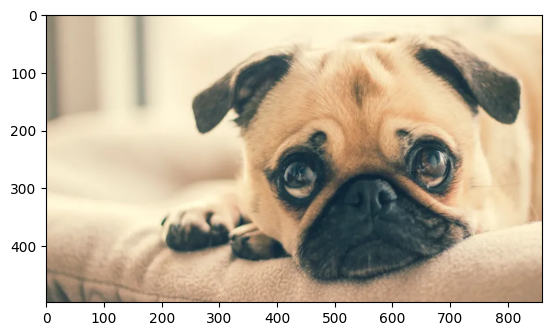

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
resp

{'num_detections': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([300.], dtype=float32)>,
 'detection_anchor_indices': <tf.Tensor: shape=(1, 300), dtype=float32, numpy=
 array([[ 12.,  13.,  23.,  50., 186.,   7., 164., 299., 299.,  16.,  86.,
          47.,  54., 116.,  16., 225.,  36.,  16.,   7.,  54.,  72.,  72.,
          16., 116.,  18., 119.,  36.,  18., 138., 245., 110.,  34.,  49.,
         119., 116., 110., 143., 116., 245., 204., 116.,  34.,  16.,  34.,
          36., 180., 138., 132., 141., 119., 273.,  23.,  88., 143., 141.,
         116., 236.,  23.,  86., 236.,  72., 264.,  23., 218.,  83., 116.,
         154.,  93., 128.,  98.,  86.,  98.,  93.,  92.,  69., 116., 129.,
          85.,  69., 138.,  93., 130., 276., 116.,  16.,  18.,  54., 154.,
         218.,  13., 116., 245.,  36.,  72., 141., 136.,  13., 138., 276.,
         180., 184., 205.,  16., 110., 138.,  98., 124.,  86.,  91., 276.,
         144., 128., 107.,  86., 276., 155.,  69., 100., 166.,  94., 276.,
 

In [ ]:
resp.keys()

dict_keys(['num_detections', 'detection_anchor_indices', 'detection_boxes', 'detection_classes', 'detection_scores', 'detection_multiclass_scores', 'raw_detection_boxes', 'raw_detection_scores'])

In [ ]:
resp["detection_boxes"]

<tf.Tensor: shape=(1, 300, 4), dtype=float32, numpy=
array([[[0.047952  , 0.2879581 , 0.93611664, 0.9798991 ],
        [0.31954923, 0.        , 0.9965527 , 1.        ],
        [0.65088385, 0.00712886, 0.9819936 , 0.99340403],
        ...,
        [0.04642629, 0.31144974, 0.96853167, 0.99179983],
        [0.6860156 , 0.2181439 , 0.87088054, 0.58482605],
        [0.4145955 , 0.8944327 , 0.6558154 , 0.9548804 ]]], dtype=float32)>

In [ ]:
resp["detection_classes"]

<tf.Tensor: shape=(1, 300), dtype=float32, numpy=
array([[18., 65., 65., 65., 65., 63., 63., 18.,  1., 65., 60.,  1., 88.,
        63., 63., 81., 17., 18., 18., 17., 18.,  1.,  1., 17., 18., 63.,
        88.,  1., 65., 65., 63., 88., 17.,  1., 21., 65., 88., 88., 63.,
        65., 20., 17., 88., 67., 60., 81., 63.,  1., 67., 18., 63., 62.,
        60., 18., 81., 23., 67., 15., 54., 62., 32., 60., 20., 22.,  3.,
        62., 17., 67., 63.,  3., 58., 67., 81., 60., 32., 67., 60., 88.,
        75., 81.,  3., 60., 18., 22., 67., 84., 61., 81., 74., 67., 15.,
        18., 74., 75., 62.,  1., 62.,  3., 17., 67.,  1., 62., 62., 62.,
        67., 63., 18., 53., 60., 65., 65., 65., 75., 59.,  1., 67., 77.,
        62., 60., 60., 88.,  3., 60., 31., 25.,  3., 31., 88., 53., 84.,
        65., 84., 77., 19., 15.,  3., 27., 60., 17., 22., 41., 52., 62.,
        65., 90., 51., 62., 81., 42., 62., 81., 27., 51., 60., 88., 52.,
        17., 63., 33., 60.,  1.,  9., 88.,  1., 17., 23., 15., 32., 67.,
 

In [ ]:
resp["detection_scores"]

<tf.Tensor: shape=(1, 300), dtype=float32, numpy=
array([[9.96149778e-01, 7.93011665e-01, 6.33487463e-01, 2.65035748e-01,
        1.98591456e-01, 1.90444469e-01, 7.52939507e-02, 6.92375228e-02,
        3.98889706e-02, 3.65600362e-02, 3.54623161e-02, 2.86353026e-02,
        2.85489913e-02, 2.61494573e-02, 1.49876131e-02, 1.33597245e-02,
        1.16430484e-02, 1.12228161e-02, 1.01804715e-02, 8.81884061e-03,
        8.79993197e-03, 7.43540237e-03, 7.40468223e-03, 6.96864119e-03,
        6.93254452e-03, 5.33390418e-03, 5.13446704e-03, 4.90672747e-03,
        4.58475621e-03, 4.47549438e-03, 4.45498293e-03, 3.69269052e-03,
        3.64281167e-03, 3.43703222e-03, 3.35102552e-03, 3.08733643e-03,
        3.03734024e-03, 2.72041932e-03, 2.65942258e-03, 2.45691184e-03,
        2.20685825e-03, 2.17835838e-03, 1.85117673e-03, 1.60652865e-03,
        1.38642173e-03, 1.37698138e-03, 1.24066148e-03, 1.22393190e-03,
        1.21655141e-03, 1.18852942e-03, 1.15675188e-03, 1.11008657e-03,
        1.0987

In [ ]:
# iterate over boxes, class_index and score list
for boxes, classes, scores in zip(resp['detection_boxes'].numpy(), resp['detection_classes'].numpy().astype(int), resp['detection_scores'].numpy()):
    for box, cls, score in zip(boxes, classes, scores): # iterate over sub values in list
        if score > 0.5: # we are using only detection with confidence of over 0.8
            ymin = int(box[0] * h)
            xmin = int(box[1] * w)
            ymax = int(box[2] * h)
            xmax = int(box[3] * w)
            # write text classname for bounding box
            cv2.putText(img, class_names[cls], (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
            # draw on image (bounding box)
            cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (128, 0, 128), 4)
            print(class_names[cls])

# convert back to bgr and save image
cv2.imwrite("output.png", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

dog
bed
bed


True

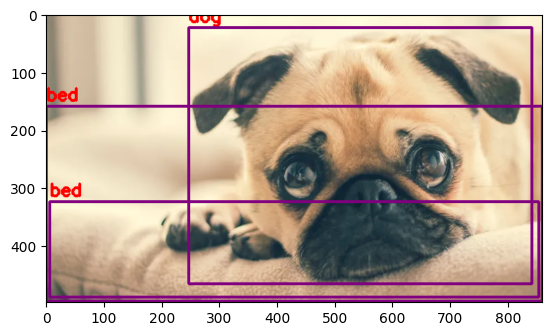

In [ ]:
plt.imshow(img)
plt.show()